Calculadora de Órbita da ISS
========================

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
G = 6.67408 * 10**(-11)                     # Constante Universal de Gravitação
M = 5.972 * 10**(24)                        # Massa da Terra

# ----------------------------------------------------------------------------------------------------------------------------


# VARIÁVEIS

# Obs.: Este programa utiliza um sistema de coordenadas cartesiano de duas dimensões, com a origem no centro da Terra



# Espaço [m]
x = 6371000 + 408000                        # Posição inicial na direção X
y = 0                                       # Posição inicial na direção Y
d = math.hypot(x, y)                        # Distância em módulo / Raio      

# Velocidade [m/s]
vx = 0                                      # Velocidade inicial na direção X / Componente X da velocidade inicial
vy = 7.66 * 1000                            # Velocidade inicial na direção Y / Componente Y da velocidade inicial
v = math.hypot(vx, vy)                      # Velocidade inicial resultante

# Aceleração [m/s²]
a  = (G * M) / (d**2)                      # Aceleração Gravitacional (Lei da Gravitação Universal de Newton)
ax =   a * math.cos(math.atan(y/x))    # Componente X da Aceleração Gravitacional
ay =   a * math.sin(math.atan(y/x))    # Componente Y da Aceleração Gravitacional

# Outros
t = 60                                      # Intervalo de tempo entre um instante e outro [em segundos]
n = 84                                      # Número de iterações
p = 2                                       # Precisão numérica: número de casas decimais para espaço e velocidade
pa = 4  

In [88]:
print("t (s)".rjust(5)+
      "x (km)".rjust(15)+
      "y (km)".rjust(15)+
      "d (km)".rjust(15)+
      "vx (km/h)".rjust(15)+
      "vy (km/h)".rjust(15)+
      "ax (m/s²)".rjust(15)+
      "ay (m/s²)".rjust(15)+
      "a (m/s²)".rjust(15))

# ----------------------------------------------------------------------------------------------------------------------------


# VALORES INICIAIS

print(str(round(float(t*(0)),2)).rjust(5)+
      str(round(float(x * 0.001),2)).rjust(15)+
      str(round(float(y * 0.001),2)).rjust(15)+
      str(round(float(d * 0.001),2)).rjust(15)+
      str(round(float(vx * 3.6),2)).rjust(15)+
      str(round(float(vy * 3.6),2)).rjust(15)+
      str(round(float(ax),pa)).rjust(15)+
      str(round(float(ay),pa)).rjust(15)+
      str(round(float(a),pa)).rjust(15))

t (s)         x (km)         y (km)         d (km)      vx (km/h)      vy (km/h)     ax (m/s²)     ay (m/s²)      a (m/s²)
  0.0         6779.0            0.0         6779.0            0.0        27576.0         8.6732            0.0         8.6732


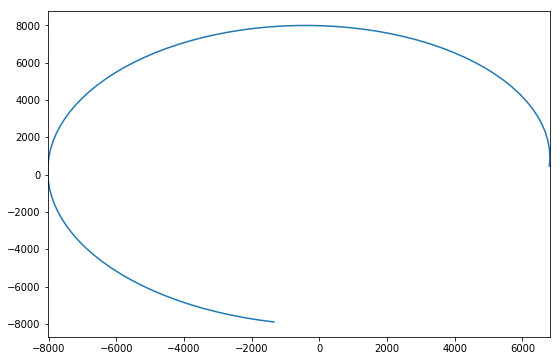

In [91]:
x_array = []
y_array = []

for i in range(n):

    # Posição no espaço
    x = x + vx * t + 0.5 * ax * t**2
    y = y + vy * t + 0.5 * ay * t**2  
    d = math.hypot(x, y)

    # Velocidade
    vx = vx + ax * t
    vy = vy + ay * t

    # Aceleração
    a  = -(G * M) / (d**2)
 
    if x > 0:
        s = 1
    else:
        s = -1
        
    atan_yx = math.atan(y/x)
    ax = s * a * math.cos(atan_yx)
    ay = s * a * math.sin(atan_yx)

    x_array.append(x * 0.001)
    y_array.append(y * 0.001)
    

ts = pd.Series(y_array, index=x_array)

ax = ts.plot()
plt.rcParams["figure.figsize"] = [9, 6]
plt.show()

TESTES COM GRÁFICOS
=====================

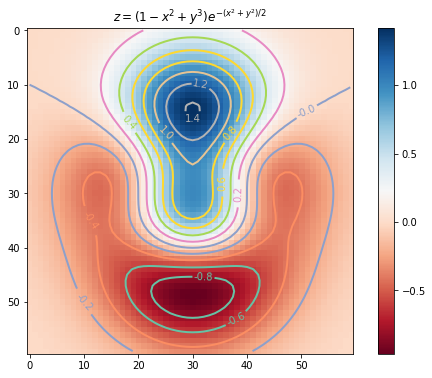

In [85]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(x,y):
 return (1-(x**2+y**3))*exp(-(x**2+y**2)/2)
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

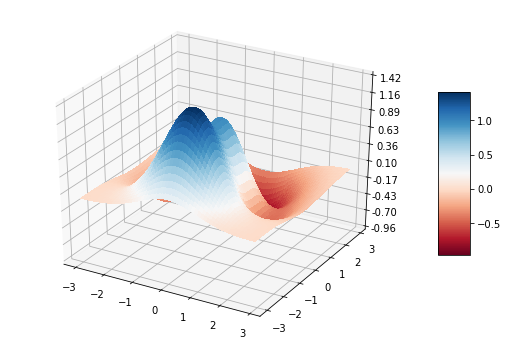

In [86]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()